# Problemy regresyjne
Rozwiązujemy
$$
f(x_i) \approx y_i
$$
gdzie $y_i$ albo należy do $\mathbb{R}^n$ (regresja) albo $y_i \in \{0,\ldots,c-1\}$ -- zmienne kategoryczne (klasyfikacja).

My będziemy zajmować się najprostszą sytuacją, gdu $n=1$ (skalarne). Także sytuacja liniowa.



## Najprostszy przypadek: tyle samo równań co niewiadomych

Zakładam, że mam $n$ punktów $x_0,\ldots,x_{n-1}$ w przestrzeni $\mathbb{R}^n$ [stosujemy zapis wierszowy], i chcemy rozwiązać problem
$$
f(x_i)=y_i,
$$
gdzie $f$ szukamy postaci $f(x)=xw$, gdzie $w \in \mathbb{R}^n$ to wektor kolumnowy.

Wtedy nasz problem to
$$
\begin{cases}
x_0 w= y_0, \\
\vdots \\
x_{n-1} w=y_{n-1}.
\end{cases}
$$
Finalnie możemy w takim razie zapisać jako
$$
Xw=y,
$$
gdzie
$$
y=\begin{bmatrix}
y_0 \\
\vdots \\
y_{n-1}
\end{bmatrix}
$$
Finalnie naszym rozwiązaniem jest wtedy
$$
w=X^{-1} y.
$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""
rozwiązujemy równanie
$$
f([1,2])=1
f([2,3])=2
$$
"""

X=np.array([[1,2],[2,3]])
y=np.array([[1],[2]])
np.linalg.inv(X) @ y

array([[1.],
       [0.]])

# MSE loss

Teraz możemy się zająć pytaniem, co by było gdyby było więcej równań niż zmiennych.

*Przykład* Mierzymy prędkość samochodu, zakładamy, że $s=v t$. W chwili $t=1$ przejechał $10$ (metrów), a w chwili $t=2$ $18$.
Dostajemy układ równań
$$
\begin{cases}
1 v=10 \\
2v=18
\end{cases}
$$
Oczywiście nie ma rozwiązania. Zakładając jednak, że nasze urządzenia pomiarowe są niedoskonałe, możemy się spytać o najlepsze $v$, czyli takie które da najmniejszy błąd kwadratowy przewidywań:
$$
SquarredErrorLoss(v)=(1v-10)^2+(2v-18)^2.
$$
[Pomysł Gaussa na szukanie zagubionej asteroidy]

Finalnie znajdujemy pochodną i przyrównujemy do zera:
$$
2(v-10)+2(2v-18)2=0,
$$
czyli $10v=92$, czyli $v=9.2$.

W konsekwencji optymalna predykcja prędkości samochodu to $9.2$.



# MNK
Zakładamy teraz, że mamy więcej punktów niż zmiennych.
Szukamy (przybliżonego) rozwiązania równania
$$
f(x_i) \approx y_i,
$$
gdzie $f$ jest zadane wzorem
$$
f(x)=xw.
$$
[$x$ to wektor wierszowy, $w$ kolumnowy]

Rozważamy loss zadany przez sumę kwadratów popełnionych błędów:
$$
SEloss(w)=\sum_i \|y_i-f(x_i)\|^2=\sum_i (y_i-x_iw)^2.
$$
Chcemy zminimalizować. Będziemy potrzebowali pochodnej.


# [DYGRESJA] Pochodna funkcji

Przypominam, że pochodna funkcji $f$ w punkcie $v$ to z definicji taka macierz $D=Df(v)$, że
$$
f(v+h)-f(v) \approx D \cdot h +o(h),
$$
gdzie $\cdot$ u góry to mnożenie macierzy przez wektor.

W praktyce macierz pochodne to zestawienie pochodnych cząstkowych po kolejnych współrzędnych
$$
Df=(\frac{\partial f}{\partial x_0},\ldots,\frac{\partial f}{\partial x_{n-1}})
$$

Dodatkowo zachodzi reguła łańcuchowa:
$$
D(f \circ g)(v)=Df(g(v)) \cdot Dg(v).
$$

*Przykład 1*
Niech $a$ będzie wektorem wierszowym.
Pochodna funkcji liniowej
$$
f:w \to aw+b.
$$
Licząć z wzoru
$$
f(w+h)-f(w)=ah,
$$
czyli trywialnie $Df(w)=a.

*Przykład 2*
Liczymy pochodna funkcji
$$
h:w \to (aw+b)^2.
$$
Zauważmy, że to pochodna funkcji złożonej (czyli kwadrat od liniowej), czyli z reguły Łańcuchowej mamy:
$$
Dh(w)=2(aw+b) \cdot a=2awa+ba=2a^Taw+ba
$$


# Wracamy do wyprowadzenia MNK

Chcemy rozwiązać problem
$$
\begin{cases}
x_0w \approx y_0, \\
\vdots \\
x_{n-1}w \approx y_{n-1},
\end{cases}
$$
równoważnie:

$
\text{(1)} \hspace{8cm} Xw \approx y.   
$


Przypominam, że loss jest dany wzorem
$$
S\!Eloss(w)=\sum_i (y_i-x_iw)^2.
$$
Możemy jeszcze uprościć do
$$
\sum_i (y_i-x_iw)^2=\sum_i y_i^2-2\sum_i y_ix_iw-2\sum_i w^T x_i^T x_i w=y^Ty+y^TXw+w^TX^TXw.
$$
Czyli w zapisie wektorowym
$$
SEloss(w)=y^Ty-2[y^TX]w+w^T[X^TX]w.
$$



Ponieważ pochodna sumy, to suma pochodnych, dostajemy z dygresji
$$
D \, S\!Eloss(w)=\sum_i D(x_iw-y_i)^2=2\sum_i D(x_iw-y_i)^2
$$
$$
=2\sum_i(x_iw-y_i) \cdot x_i=2\sum_i(w_i^Tx_i^T-y_i) \cdot x_i=
2w^T(X^TX)-2y^TX.
$$

Otrzymaliśmy, że pochodna lossu jest dana wzorem
$$
D SEloss(w)=2w^T(X^TX)-2y^TX.
$$
Przyrównując loss do zera, dostajemy równanie
$$
X^T Xw=X^Ty.
$$
UWAGA (ŁATWO ZAPAMIĘTAĆ): To równanie polega w praktyce na przemnożeniu obu stron oryginalnego równania (1) przez $X^T$.

Okazuje się, że zawsze ma rozwiązanie. Jeżeli macierz $X^TX$ jest odwracalne (co zazwyczaj zachodzi), jest dane wzorem
$$
w=(X^TX)^{-1}(X^Ty).
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""
znajdujemy funkcję liniową $f$ która w sposób przybliżony rozwiązuje problem MNK
$$
f([1,2])=1
f([2,3])=2
f([3,4])=2
$$
"""

X=np.array([[1,2],[2,3],[3,4]])
y=np.array([[1],[2],[2]])
w=np.linalg.inv(X.T@X) @ (X.T@ y)
print(w)

[[-0.16666667]
 [ 0.66666667]]


Czyli przybliżonym rozwiązaniem jest funkcja
$$
f(x)=f(x0,x1)=xw=w0\cdot x0+w1 \cdot x1.
$$

Warto wtedy jeszcze policzyć MSE (średni kwadratowy błąd) tego rozwiązania.

# Regresja wielomianowa

Rozrzeszamy przestrzeń tworząc nowe cechy, i rozwiązujemy model liniowy w rozszerzonej przestrzeni. W regresji wielomianowej rozszerzamy $x \to (1,x,\ldots,x^n)$.

Współczynniki regresji beta: [ 4.50351249e+00 -2.88135907e+00 -1.26968780e+01  6.27159245e+01
  1.03339984e+02 -3.59960685e+02 -3.40659900e+02  9.43781810e+02
  5.24637244e+02 -1.34047652e+03 -4.14106985e+02  1.11928369e+03
  1.56440101e+02 -5.62793923e+02 -1.10302609e+01  1.66638330e+02
 -1.12111585e+01 -2.66169885e+01  3.48146169e+00  1.76047033e+00
 -3.12838495e-01]


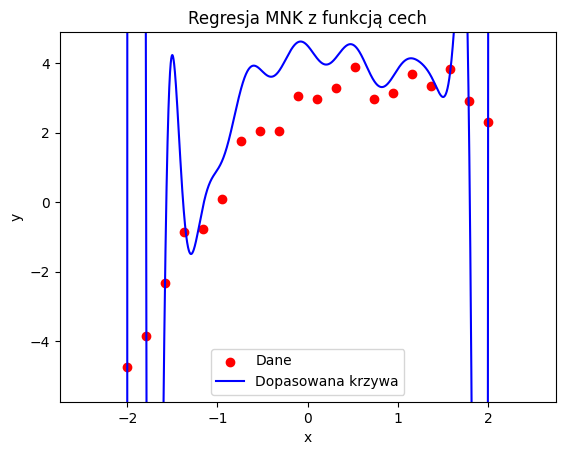

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowa funkcja cech: wielomian stopnia n
def feature_map(x):
  n=20
  """Przekształca skalar x w wektor cech [1, x, x^2, ..., x^n]."""
  return np.array([x**i for i in range(n + 1)])  # Od x^0 do x^n

# Funkcja do budowy macierzy cech
def build_feature_matrix(x_values):
    """Tworzy macierz cech dla zbioru x_values przy użyciu feature_function."""
    return np.array([feature_map(x) for x in x_values])

# Metoda MNK dla transformowanych danych
def least_squares_fit(x_values, y_values):
    """Oblicza współczynniki regresji MNK dla cech wygenerowanych przez feature_function."""
    X = build_feature_matrix(x_values)  # Macierz cech
    y = np.array(y_values)  # Wektor wyników
    beta = np.linalg.inv(X.T@X) @ (X.T@ y)  # Rozwiązanie MNK
    return beta

# Generowanie przykładowych danych
np.random.seed(42)
x_samples = np.linspace(-2, 2, 20)  # Przykładowe x_i
y_samples = 3 + 2 * x_samples - x_samples**2 + np.random.normal(0, 0.5, len(x_samples))  # Przykładowe y_i (z szumem)

# Dopasowanie modelu
beta_opt = least_squares_fit(x_samples, y_samples)
print("Współczynniki regresji beta:", beta_opt)

# Wizualizacja dopasowania
x_plot = np.linspace(-2.5, 2.5, 10000)
y_plot = [np.dot(beta_opt, feature_map(x)) for x in x_plot]

y_min, y_max = min(y_samples), max(y_samples)
plt.ylim(y_min - 1, y_max + 1)  # Ustawienie zakresu y

plt.scatter(x_samples, y_samples, color='red', label="Dane")
plt.plot(x_plot, y_plot, color='blue', label="Dopasowana krzywa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresja MNK z funkcją cech")
plt.show()


Widzimy, że dla dużych $n$ (na przykład 30) model się nadmiernie dopasowuje do danych (overfitting). Upraszczając, zapamiętuje je zamiast generalizować. Sa różne techniki aby z tym walczyć, jedną z nich jest regularyzacja.

# Brzytwa Ockhama

A co jak model się overfituje do danych? Karzemy go za skomplikowanie, czyli do loss-u dodajemy regularyzację L2, czyli sumę kwadratów współczynników wag $w$ (powstaje model zwany ridge regression).

Czyli wtedy loss będzie zadany przez
$$
loss=SEloss(w)+\lambda \|w\|^2.
$$
Ponieważ $\|w\|^2=w^TIw$, dostajemy
$$
loss=y^Ty +2[y^TX]w+ w^T [X^TX+\lambda I] w.
$$
Finalnie zatem rozwiązanie jest zadane przez
$$
w=(X^TX+\lambda I)^{-1}X^Ty
$$



[ 2.42251346  0.8092993  -0.05362689  0.43916275 -0.28868486  0.32303432
 -0.2498657   0.17405571 -0.1225776  -0.02902243  0.02650766 -0.1870848
  0.12164513 -0.11717483  0.06824411  0.18658833 -0.10860074 -0.06244626
  0.03530078  0.00647451 -0.00355872]


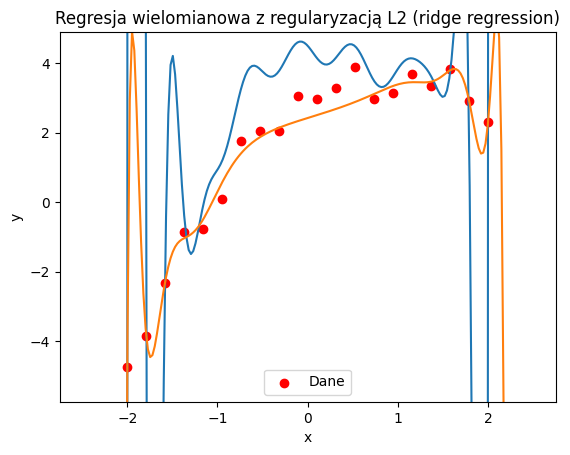

In [3]:
def ridge_fit(x_values, y_values, lambd):
    """Oblicza współczynniki regresji MNK dla cech wygenerowanych przez feature_function."""
    X = build_feature_matrix(x_values)  # Macierz cech
    y = np.array(y_values)  # Wektor wyników
    beta = np.linalg.inv(X.T@X+np.eye(X.shape[1])*lambd) @ (X.T@ y)  # Rozwiązanie MNK
    return beta

# Dopasowanie modelu
beta_ridge = ridge_fit(x_samples, y_samples, 1)
print(beta_ridge)

# Wizualizacja dopasowania
x_plot = np.linspace(-2.5, 2.5, 200)
y_plot = [np.dot(beta_opt, feature_map(x)) for x in x_plot]
y_lasso = [np.dot(beta_ridge, feature_map(x)) for x in x_plot]

y_min, y_max = min(y_samples), max(y_samples)
plt.ylim(y_min - 1, y_max + 1)  # Ustawienie zakresu y

plt.scatter(x_samples, y_samples, color='red', label="Dane")
plt.plot(x_plot, y_plot, x_plot, y_lasso)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresja wielomianowa z regularyzacją L2 (ridge regression)")
plt.show()


## Lasso regresion
jak się doda błąd L1, czyli suma modułów wag $\sum_i |w_i|$, to powstaje model zwany Lasso regression. On ma tą własność, że zeruje część wag modelu. Nie ma tak prostego rozwiązania jak Ridge, ale też da się rozwiązać. W scikitlearn są zaimplementowane za równo Lasso, jak i Ridge regression.